<h2 style="color:MediumSeaGreen;">Implementing Grover's algorithm</h2>

In [2]:
!pip install qiskit-aer

  Using cached qiskit_aer-0.14.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached qiskit-1.1.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 842.4 kB/s eta 0:00:00a 0:00:01
  Using cached rustworkx-0.14.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10.0 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.2.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached symengine-0.11.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (1.2 kB)
  Using cached pbr-6.0.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached qiskit_aer-0.14.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
Using cached qiskit-1.1.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x8

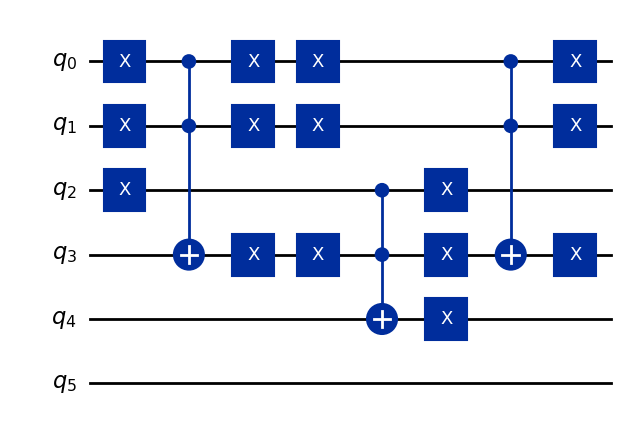

In [3]:
from qiskit import QuantumCircuit

def qnand(circ, arg1, arg2, arg3):
    #add a reversible nand gate to the circuit
    circ.ccx(arg1, arg2, arg3)
    circ.x(arg3)
    circ.x(arg1)
    circ.x(arg2)

def uor_circuit():
    # Initialize a QuantumCircuit with 6 qubits
    circuit = QuantumCircuit(6)

    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    
    # Add the QNAND gates
    qnand(circuit, 0, 1, 3)

    circuit.x(3)
    qnand(circuit, 3, 2, 4)
    circuit.x(0)
    circuit.x(1)
    
    qnand(circuit, 0, 1, 3)


    return circuit

# Create and draw the circuit
uor_circ = uor_circuit()
uor_circ.draw(output='mpl')

In [4]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Initialize simulator
simulator = Aer.get_backend('qasm_simulator')

# Loop over all possible combinations of the first three qubits
for i in range(8):
    # Convert i to binary and pad with zeros to get a string of length 3
    state = format(i, '03b')

    # Initialize a QuantumCircuit with 6 qubits and 6 classical bits for measurement
    circuit = QuantumCircuit(6, 6)

    # Initialize the state to the current combination
    for j in range(3):
        if state[j] == '1':
            circuit.x(j)

    # Add the UOR circuit
    circuit = circuit.compose(uor_circuit())

    # Measure all qubits
    circuit.measure(range(6), range(6))

    # Execute the circuit on the simulator
    job = simulator.run(circuit, shots=1)

    # Grab the results from the job
    result = job.result()

    # Get the counts (how many times each result was obtained)
    counts = result.get_counts()

    # Print the results
    print(f"For initial state |{state}⟩|000⟩, the result is {list(counts.keys())[0][::-1]}")

    # Plot the results
    plot_histogram(counts)

For initial state |000⟩|000⟩, the result is 000000
For initial state |001⟩|000⟩, the result is 001010
For initial state |010⟩|000⟩, the result is 010010
For initial state |011⟩|000⟩, the result is 011010
For initial state |100⟩|000⟩, the result is 100010
For initial state |101⟩|000⟩, the result is 101010
For initial state |110⟩|000⟩, the result is 110010
For initial state |111⟩|000⟩, the result is 111010


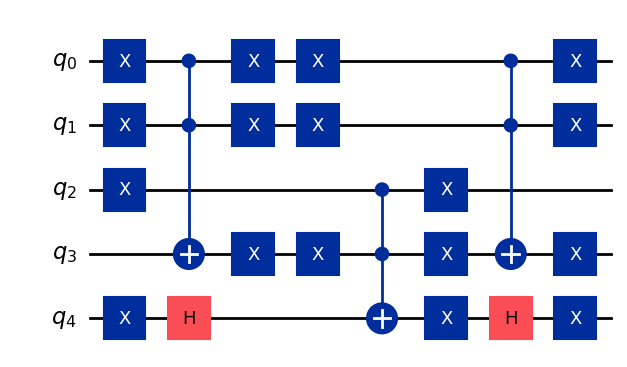

In [5]:
#your code
def R_tilda(circuit):
    # Initialize a QuantumCircuit with 5 qubits

    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    circuit.x(4)
    
    circuit.h(4)
    
    # Add the QNAND gates
    qnand(circuit, 0, 1, 3)

    circuit.x(3)
    qnand(circuit, 3, 2, 4)
    circuit.x(0)
    circuit.x(1)
    
    qnand(circuit, 0, 1, 3)
    
    circuit.h(4)
    circuit.x(4)

# Create and draw the circuit
circuit = QuantumCircuit(5)
R_tilda(circuit)
circuit.draw(output='mpl')

In [6]:
from python_functions.grover_black_box_function import U_f

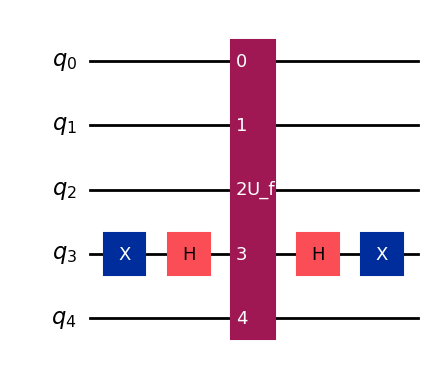

In [7]:
#your code
def O_f(circuit):
    circuit.x(3)
    circuit.h(3)

    U_f(circuit, [0, 1, 2, 3, 4])

    circuit.h(3)
    circuit.x(3)

circuit = QuantumCircuit(5) 
O_f(circuit)
circuit.draw(output='mpl')

In [8]:
#your code
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile

def R_gate(circuit):
    circuit.h([0, 1, 2])
    R_tilda(circuit)
    circuit.h([0, 1, 2])
    
    
def grover_algorithm(circuit, n):
    #Apply Hadamard to 0, 1, and 2
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    
    #Apply O then R n times
    for i in range(n):
        #Apply O
        O_f(circuit)

        #Apply R
        R_gate(circuit)

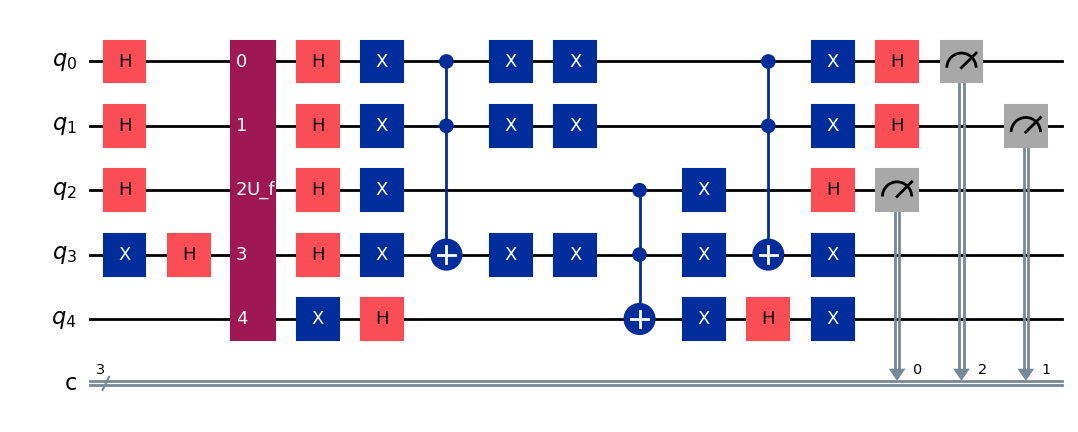

In [9]:
circuit1 = QuantumCircuit(5, 3)
circuit2 = QuantumCircuit(5, 3)
circuit3 = QuantumCircuit(5, 3)

#Draw circuit with n = 1
grover_algorithm(circuit1, 1)
circuit1.measure([0, 1, 2], [2, 1, 0])
circuit1.draw(output='mpl')

circuit2


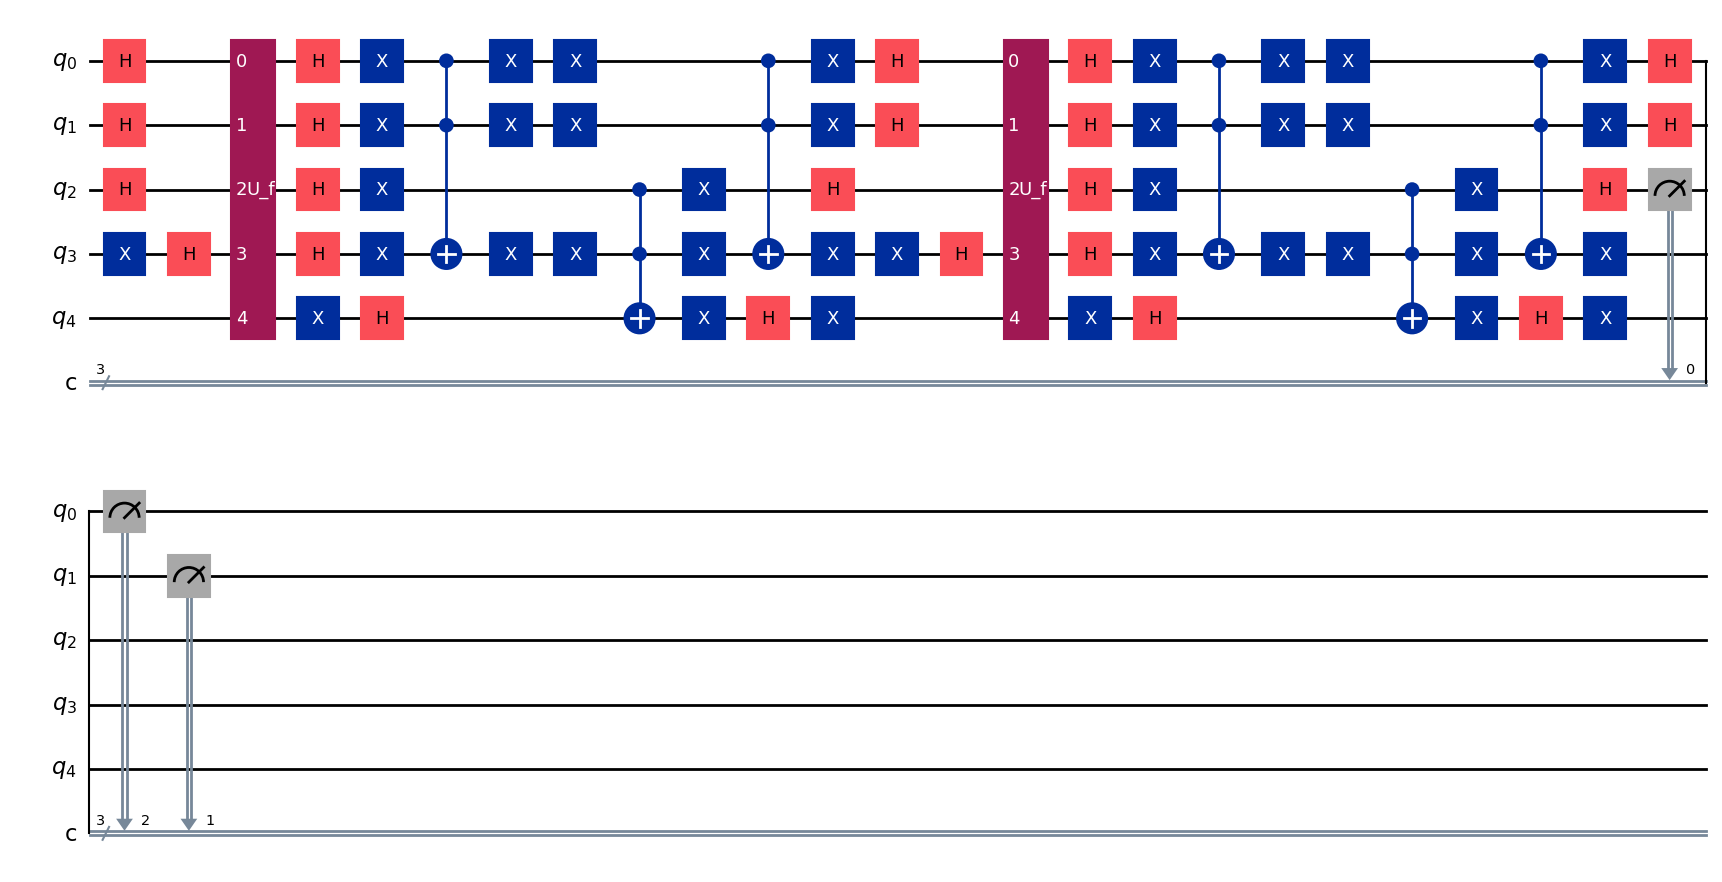

In [10]:
#Draw circuit with n = 2
grover_algorithm(circuit2, 2)
circuit2.measure([0, 1, 2], [2, 1, 0])
print("circuit2")
circuit2.draw(output='mpl')

circuit3


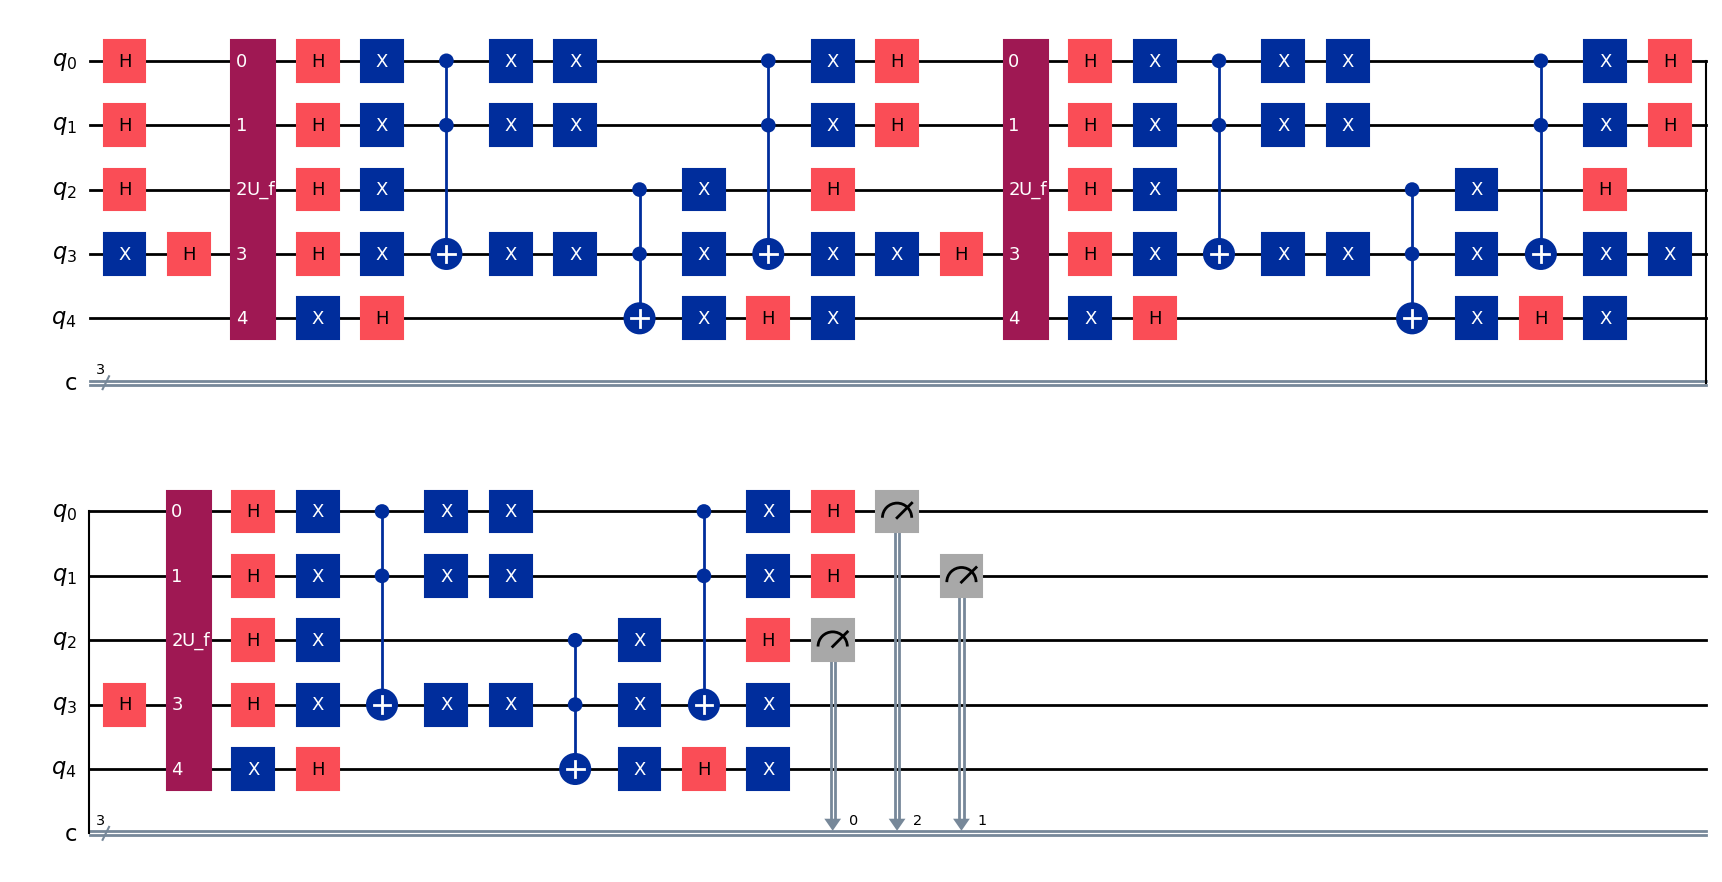

In [11]:
#Draw circuit with n = 3
grover_algorithm(circuit3, 3)
circuit3.measure([0, 1, 2], [2, 1, 0])
print("circuit3")
circuit3.draw(output='mpl')

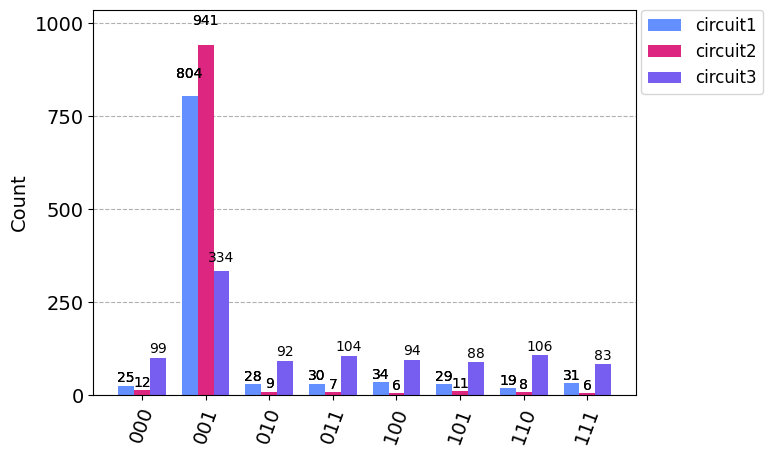

In [12]:
# Initialize simulator
simulator = Aer.get_backend('aer_simulator')

# Run circuit1
transpiled_circuit1 = transpile(circuit1, basis_gates=['rx', 'ry', 'cx'], optimization_level=3)
result1 = simulator.run(transpiled_circuit1, shots=1000).result()
counts1 = result1.get_counts()

# Run circuit2
transpiled_circuit2 = transpile(circuit2, basis_gates=['rx', 'ry', 'cx'], optimization_level=3)
result2 = simulator.run(transpiled_circuit2, shots=1000).result()
counts2 = result2.get_counts()

# Run circuit3
transpiled_circuit3 = transpile(circuit3, basis_gates=['rx', 'ry', 'cx'], optimization_level=3)
result3 = simulator.run(transpiled_circuit3, shots=1000).result()
counts3 = result3.get_counts()

# Plot the results
plot_histogram([counts1, counts2, counts3], legend=['circuit1', 'circuit2', 'circuit3'])

{'1': 1000}


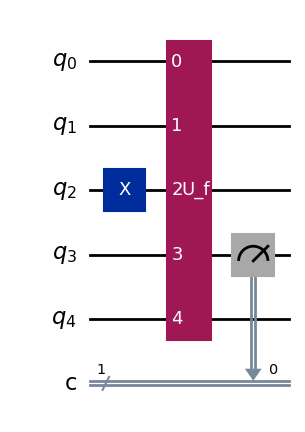

In [13]:
from python_functions.grover_black_box_function import U_f
from qiskit import transpile
x_star = '001'

#run a simulation of the circuit that applies U_f on |x_star>|00>
simulator = Aer.get_backend('aer_simulator')
circ = QuantumCircuit(5, 1)

#Initialize the first three qubits to be 001 respectively
circ.x(2)

#Apply U_f
U_f(circ, [0, 1, 2, 3, 4])

#Measure 3
circ.measure([3], [0])

transpiled_circ = transpile(circ, basis_gates=['rx', 'ry', 'cx'], optimization_level=3)

result = simulator.run(transpiled_circ, shots=1000).result()

counts = result.get_counts()

print(counts)

circ.draw(output='mpl')

In [14]:
#your code

from qbraid.providers import QbraidProvider
from qbraid import get_devices

token = '98dd9709a12d18bb0a92cc59468b52d22b2c149cf290e1bb2f7e492644ad2cc3eae2a112b1508fbc727c14783ab2c449036ea76be4f7dd3d366de457ae9cd95a' #your IBM Quantum API token
provider = QbraidProvider(qiskit_ibm_token=token)

get_devices()

Provider,Name,qBraid ID,Status
AWS,DM1,aws_dm_sim,●
AWS,SV1,aws_sv_sim,●
AWS,TN1,aws_tn_sim,●
IBM,Brisbane,ibm_q_brisbane,●
IBM,Ext. stabilizer simulator,ibm_q_simulator_extended_stabilizer,○
IBM,Kyoto,ibm_q_kyoto,○
IBM,MPS simulator,ibm_q_simulator_mps,○
IBM,Osaka,ibm_q_osaka,●
IBM,Oslo,ibm_q_oslo,○
IBM,QASM simulator,ibm_q_qasm_simulator,○


In [ ]:
most_promising_circuit = transpiled_circuit2
device1 = provider.get_device("ibm_q_brisbane")
device2 = provider.get_device("ibm_q_osaka")

print("Running on current least busy device: ", device1)
print("Running on next least busy device: ", device2)

# Transpile the circuit for the specific device
#compiled_circuit1 = transpile(most_promising_circuit, device1, optimization_level=3)
#compiled_circuit2 = transpile(most_promising_circuit, device2, optimization_level=3)

# Execute the job on the device
job1 = device1.run(most_promising_circuit)
job2 = device2.run(most_promising_circuit)

# Get the results
result1 = job1.result().get_counts(most_promising_circuit)
result2 = job2.result().get_counts(most_promising_circuit)

# Plot the results
plot_histogram([result1, result2], legend=[device1.name(), device2.name()])

Running on current least busy device:  IBM IBM ibm_brisbane device wrapper
Running on next least busy device:  IBM IBM ibm_osaka device wrapper
